# Setup Future DBD DataFrames

This DataFrame will be used for predicting demand and ultimately recommending rates.

This notebooks makes use of the `generate_hotel_dfs` and `model_cancellations` functions found in `utils.py`.

In [1]:
import pandas as pd
import numpy as np
from dbds import generate_hotel_dfs
from sim import generate_simulation
from model_cancellations import predict_cancellations

In [2]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 70

## Hotel Capacities

H1: 187

H2: 226

Additional columns needed:

* Rooms/ADR booked running 30/90
* LY actual RS/ADR/Occ
* STLY OTB/ADR
* Rooms booked moving forward LY
* Rooms/ADR booked running 30/90 STLY
* OTB/ADR pace
* L30/L90 pace
* RevPAR


In [3]:
# %%time
# h1_res, h1_dbd = generate_hotel_dfs("../data/H1.csv", capacity=187)
# print("H1 complete.")
# h2_res, h2_dbd = generate_hotel_dfs("../data/H2.csv", capacity=226)

In [4]:
# h1_res.to_pickle("pickle/h1_res.pick")
# h2_res.to_pickle("pickle/h2_res.pick")
# h1_dbd.to_pickle("pickle/h1_dbd.pick")
# h2_dbd.to_pickle("pickle/h2_dbd.pick")

In [5]:
h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")

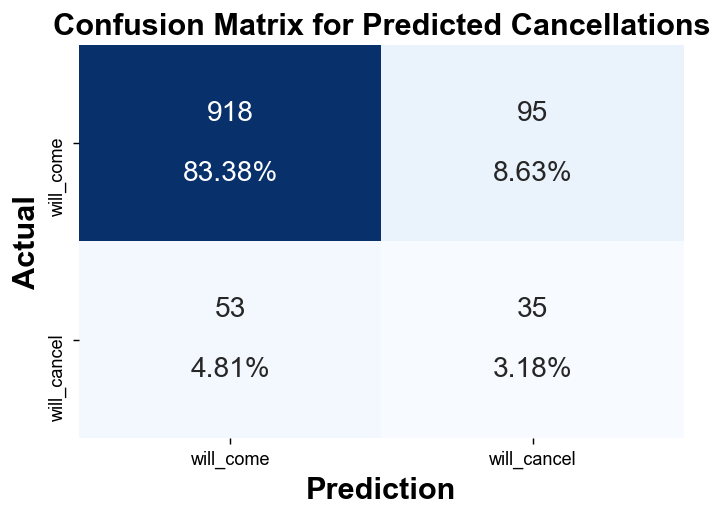

Optimal probability threshold (to maximize F-1): 0.65
F-1 Score: 0.321



In [6]:
df_res = predict_cancellations(h1_res, '2017-08-01', 1)


In [ ]:
h1_res[h1_res.will_cancel==True]

In [ ]:
# add predictions back into original df, making sure indices align
h1_res.head(2)

In [ ]:
df_test.head(2)

In [ ]:
len(h1_res), len(h2_res)

In [ ]:
h1_res[h1_res.ArrivalDate == '2017-08-04'].IsCanceled.sum()

In [ ]:
h1_sim = generate_simulation(h1_dbd, "2017-08-01", 1, h1_res)

In [ ]:
h1_dbd.loc['2016-08-02', ["RoomsSold"]]

In [ ]:
# h1_sim.to_pickle("pickle/h1_sim_stly.pick")
# h1_sim.to_csv("pickle/h1_sim_stly.csv")

In [ ]:
h2_sim = generate_simulation(h2_dbd, "2017-08-01", 2, h2_res)

In [ ]:
# h2_sim.to_pickle("pickle/h2_sim_stly.pick")
# h2_sim.to_csv("pickle/h2_sim_stly.csv")

In [ ]:
h2_sim.head(5)

In [ ]:
h1_dbd.columns

# EW- Add cancels thus far OTB

By modifying sim.add_sim_cols?

In [ ]:
h1_sim.head(10)

In [ ]:
h1_dbd.loc["2017-08-01":"2017-08-31"].head(10)

In [ ]:
h1_sim.loc['2017-08-01', ["RoomsOTB", "LYA_RoomsSold", "STLY_OTB", "STLY_Date"]]

In [ ]:
import datetime

d1 = datetime.date(2020, 5, 5)
d2 = datetime.date(2020, 2, 5)